# VISUALIZACIÓN

![elgif](https://mms.businesswire.com/media/20210504005326/en/875727/5/plot-demo.gif)

---
## 1 -  Objetivos
---
<a></a>
En Python podemos realizar visualizaciones de todo tipo.

Nuestro objetivos es doble:
- Visualizar los datos para realizar un análisis exploratorio de los datos, **EDA** . Necesitamos entender correctamente los datos y la visualización es una gran herramienta para ello.
- Representar los datos de tal manera que tengan narrativa, que podamos contar una historia a través de ellos y obtener unas **conclusiones**. Es lo que se llama **storytelling**.

**¿Qué es storytelling?**

Es una técnica que utiliza datos para contar una historia. Es una forma útil de presentar información, tanto con audiencias internas como externas. Si estás realizando la presentación de un informe, por ejemplo, puedes expresar mejor una idea o explicar mejor un punto si utilizas gráficos, tablas o infografías, ya que dichos contenidos retienen la atención de tu audiencia de una manera que un texto o incluso un video no lo pueden hacer. Estas herramientas facilitan el procesamiento de toda la información a la vez y la toma de decisiones.

El storytelling va más allá de representar datos de una manera más atractiva. Consiste en mostrar cómo o por qué los datos cambiaron durante un período, y para eso es necesario reunir:

+ una narrativa
+ un contexto
+ personajes

Estos son los factores clave para que tu audiencia se involucre realmente con el contenido y lo **entienda**.

---
## 2 - Seaborn
---
Vamos a empezar con Seaborn es la librería más usada en visualización. Aunque como siempre existen más alternativas.

Aquí la docu completa de SNS --> https://seaborn.pydata.org/tutorial/introduction.html

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Vamos a cargar 4 datasets con los que vamos a trastear, de los existentes en SNS.

1. **penguins** : Un dataset de pingüinos. Con info de especie, peso, longitud de pico, sexo, isla, etc.
2. **tips** : Un dataset de propinas. Con info de la cuenta, propina, comensales...
3. **titanic** : Un dataset de los pasajeros del Titanic. Con info de clase, edad, sexo, supervivencia...
4. **flights** : Un dataset de vuelos.


In [ ]:
penguins = sns.load_dataset("penguins") #Especies de pinguinos
tips = sns.load_dataset("tips") #Propinas fumadores y no fumadores
titanic = sns.load_dataset("titanic")
vuelos = sns.load_dataset("flights")

In [ ]:
#Podemos ver todos los datasets que tenemos disponibles
sns.get_dataset_names()

En este enlace tenéis todos los datasets de Seaborn disponibles desde su Github --> [enlace](https://github.com/mwaskom/seaborn-data?tab=readme-ov-file)

## 2.1 - Configuraciones previas / Mantra

In [ ]:
# Matplotlib inline para visualizar los gráficos de Matplotlib
#Para que se vean los gráficos en el notebook
%matplotlib inline
#Para que se vean los gráficos en alta resolución
%config Inlinebackend.figure_format= 'retina'

In [ ]:
# Configuración para setear y que todas las fig de Seaborn salgan por defecto con este tamaño
# Se puede especificar el tamaño de cada figura
sns.set_context("poster") #paper, notebook, talk, poster
sns.set(rc={"figure.figsize": (8.,4.)}) #Tamaño de las figuras, ancho y alto
sns.set_style("whitegrid") #darkgrid, whitegrid, dark, white, ticks
#sns.set_palette("colorblind") # deep, muted, pastel, bright, dark, colorblind

---
## 3 - GRÁFICOS
---

## 3.1 - Gráficos de Barras
Muestre los recuentos de las *observaciones* en cada casilla *categórica* utilizando barras.

In [ ]:
penguins.head() #ojeada de que pinta tiene nuestro df

In [ ]:
penguins.groupby("species").count() #Estoy haciendo un conteo de registros

In [ ]:
# ¿Por que no tengo el mismo número de conteo en todas las columnas?

In [ ]:
sns.countplot(x=penguins.species) #Estoy mirando cuantos registros hay en cada etiqueta de 'species'

In [ ]:
sns.countplot(x=penguins.species); #Estoy mirando cuantos registros hay en cada etiqueta de 'species'

In [ ]:
sns.countplot(penguins, x='species', hue='species', legend = False); #es lo mismo que lo anterior

Quiero dar la información lo más concisa posible.

Lo primero es **guardarme** el gráfico en una variable, por convención eso se hace con **ax** o con **plot**. Hago el mismo gráfico y le digo que haga un gráfico con la misma información que antes. Además le digo que lo ordene en función del value_counts() (value_counts() se autoordena automáticamente). Y que lo haga en base al índice.

In [ ]:
ax = sns.countplot(x=penguins.species,
                   hue=penguins.species,
                   #hue=penguins.species,
                   legend = False,
                   order=penguins.species.value_counts().index)

Al guardarme ax como variable esto es un objeto. Por lo que tengo varios atributos dentro de él.

`ax.patches`: patches son las barras. Por cada elemento que hay en patches (por cada barra en el BarPlot) le voy a decir que me ponga un texto.

Con `ax.anotate` le voy a decir que me cree un texto en cada barra

- **p.get_height()**: la altura de cada barra, que indique hasta dónde llega. Es decir el valor de cada barra.
- el siguiente argumento es una tupla
  - **p.get_x()**: dónde me lo vas a colocar en el eje x -> le digo que me lo ponga a +0.3 y eso es lo que hace que se desplace horizontalmente (sobre el eje X) sobre la columna.
  - **p.get_height()**: este segundo elemento de la tupla es para la altura (la posición sobre el eje Y). Al ponerle **/2** le digo que lo ponga a la mitad del gráfico.

In [ ]:
#añadimos etiquetas para saber el numero exacto de cada especie
ax = sns.countplot(x=penguins.species,
                   hue=penguins.species,
                   legend = False,
                   order=penguins.species.value_counts().index) #Estoy usando mi countplot de antes pero dando datos extras
for p in ax.patches:
    ax.annotate(p.get_height(), #Estoy añadiendo una etiqueta a cada barra
                (p.get_x()+0.3,
                 p.get_height()/2)) #El segundo argumento, le dice donde ubica la etiqueta del dato

In [ ]:
#Guardamos el grafico en un archivo
ax.figure.savefig("especies_pinguinos_v2.png",
                  dpi=1000) #dpi indica la calidad a la que exporto

Podemos exportar nuestras visualizaciones a un archivo de imagen con el método `savefig()`.

Los formatos de archivo disponibles son muchos, entre ellos: png, jpg, jpeg,svg, pdf, etc.


## 3.2 - BarPlot / gráfico de velas (**No confundir** con el countplot!)

**BarPlot**
Este gráfico representa una estimación de la tendencia central de una variable numérica con la altura de cada rectángulo y proporciona alguna indicación de la incertidumbre en torno a esa estimación mediante barras de error.

Es decir, en el eje X tengo una variable **categórica** y en el eje Y tengo una variable **numérica**. Y en el centro de cada barra tengo la **media** de esa variable numérica. Además, en la parte superior de la barra tengo la desviación estándar de esa variable numérica.

[DOCU BarPLot](https://seaborn.pydata.org/generated/seaborn.barplot.html)

En el DF de vuelos tengo los pasajeros que vuelan en cada mes entre 1949 y 1960.

In [ ]:
vuelos.head()

In [ ]:
vuelos.year.min(), vuelos.year.max() #Tengo datos entre el 49 y el 60

In [ ]:
vuelos[vuelos.year == 1960]

In [ ]:
vuelos[vuelos.year == 1949]

Vamos a hacer un barplot poniendo en el eje X los años. En el Y los pasajeros

In [ ]:
#Vamos a sacar ese barplot, en errorbar le indico sd (standard deviation) ahora veremos para que
sns.barplot(x='year', y="passengers", data=vuelos, errorbar='sd' ,hue = 'year', legend = False);

Que es lo que hace este **barplot**, agrupa por año, pero claro dentro de cada año tengo varios registros de meses. Lo que me está dando es el dato de ***media de pasajeros mensuales*** para el año en cuestión.

La 'vela', porque tambien se llama gráfico de velas, me indica, como es la **desviacion standard**. Cuanto se separan los datos de esa media. Lo que varían los pasajeros respecto a la media dentro del mismo año.

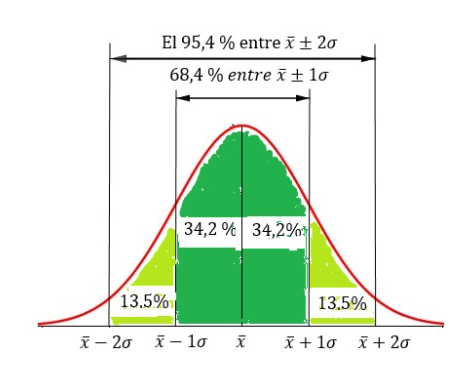

La **desviación estándar** es una medida de dispersión **central** porque se mide sobre la media.

La sd nos dice cuánto se alejan los datos de la media. Se calcula como la raíz cuadrada de la varianza.

Esta medida es muy útil para saber cuánto se alejan los datos de la media. Si la desviación estándar es pequeña, los datos están muy cerca de la media. Si la desviación estándar es grande, los datos están muy dispersos.

En una distribución normal:

De mi media +/- 1 'sd' tengo el 68,4% de los datos.

de mi media +/- 2 'sd' tengo el 95,4% de los datos.

In [ ]:
vuelos.shape

In [ ]:
vuelos.describe().T

In [ ]:
#Saco la media por años, es lo que me esta pintando sns
# Estos valores son las alturas de las barras
vuelos.groupby("year").mean(numeric_only = True)

In [ ]:
vuelos[vuelos['year'] == 1949]

Lo que me indica esa *vela* es la varibalidad dentro del año.
Vamos a comprobarlo:(vais 😉)

Nos fijaremos en el año 49 y 60, son los que mas y menos *vela* tienen

1º Vamos a sacar los registros del año 49 solamente y vamos a ver cual es la diferencia entre el mes que más y menos pajeros tiene. No lo hagais a ojimetro, podeis hacerlo de VARIAS maneras. a ver que se os ocurre

In [ ]:
#Tu código aquí

2º Hagamos los mismo con el año 60, esa variacion entre máximos y mínimos como es?

In [ ]:
#Tu código aquí

Podemos realizar infinidad de cambios *estéticos* en nuestros gráficos y que serán de gran ayuda para la interpretación de los mismos.


Podemos cambiarle los **colores** a los gráficos utilizando el argumento `palette = "código de color"`     

Revisa las paletas de seaborn --> [Aquí](https://seaborn.pydata.org/tutorial/color_palettes.html)

In [ ]:
sns.barplot(x='year', y="passengers", data=vuelos, errorbar='sd' ,hue = 'year', legend = False, palette='viridis');

Si puedo dejar el gráfico lo más sencillo posible pero que se vea la información de manera fácil y sencilla mejor.

La homogeneidad con las paletas de colores a lo largo de un análisis facilita el storytelling. Ese tipo de cosas son completamente personalizables y parametrizables.

In [ ]:
ax = sns.countplot(x="species",
              data=penguins, palette="magma", hue = 'species', legend = False);

#giramos las etiquetas con matplotlib
plt.xticks(rotation=45);


In [ ]:
# con otra paleta de colores
ax = sns.countplot(x="species",
                   data=penguins,
                   hue = 'species',
                   palette="colorblind",
                   order=penguins.species.value_counts().index);

# además le añado parámetros para que me añada el conteo en las barras
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()/2))

### Matplotlib
El mismo countplot que hemos realizado en seaborn se llama "bar plot" en matplotlib. Es un gráfico de barras.     
Basta con tener el dataframe agrupado y añadir `.plot`

In [ ]:
gr = penguins["species"].value_counts().plot(kind="bar", title="Individuos por especie")

#xticks es para ajustar distintos parámetros con las etiquetas del eje X
plt.xticks(rotation=45);

¿Cuándo usar una o la otra? Realmente podemos hacer lo mismo con ambas, Matplotlib es tremendamente poderosa y Seaborn se ha construido en base a Matplotlib pero es sintácticamente más sencilla y visualmente un poco más moderna.       
A quien quieres más a mamá o papá?: --> [matplotlib vs seaborn](https://www.geeksforgeeks.org/difference-between-matplotlib-vs-seaborn/)

### Gráficos con más de una barra, agrupando variables
Podemos crear gráficos de barras agrupadas y añadir, por lo tanto, una dimensión adicional a la gráfica recurriendo al parámetro **hue**, que provoca que cada barra se divida en tantos tramos como valores distintos de la variable haya en este argumento.

Podemos tener datos agrupados por varios campos como por ejemplo con los datos de los pingüinos: agrupados sobre las especies y luego por sexos.

In [ ]:
penguins.sample(5)

In [ ]:
#Numero de pinguinos por especie
penguins.groupby("species").sex.value_counts()

#penguins.species.value_counts()

Esto mismo puedo hacerlo con **hue=**, argumento que me separa grupos de barras por la columna que le diga. Lo que hace el countplot en este ejemplo es hacer un count de todos los pingüinos de Adelie y el resto de especies. Al decirle que separe eso por 'sex' de cada count hace una barra con el count por sexo. Así que hace un grupo de barras por cada especie, grupos de dos barras, pues la información que le estoy dando en el hue= tiene dos valores.

In [ ]:
penguins

In [ ]:
sns.countplot(x="species", hue="sex", data=penguins);

Al ver lo valores únicos vemos que no nos está pintando cuántos NaN hay, pero realmente hay NaN.

Puede ser que necesitemos poder pintar dentro de cada especie a parte de cuántos machos y hembra tenemos cuántos tenemos sin clasificar.

¿Cómo hacemos para solucionar los nulos? Podemos hacer un .fillna() y darles un valor...

In [ ]:
penguins.sex.unique()

In [ ]:
penguins.sex.fillna('pingüino fluido', inplace = True)

In [ ]:
penguins.sex.unique()

In [ ]:
ax = sns.countplot(x=penguins.species, hue=penguins.sex); # igual que el anterior, otra sintaxis llamando a las columnas de manera distinta


In [ ]:
# nos ha añadido el grupo verde en los pingüinos y vemos que teníamos NaN tango en Adelie como en Gentoo

Se os ocurre como podríamos hacer el mismo gráfico pero en horizontal?? 🙃

In [ ]:
#Tu código aquí

Vamos a hacerlo con otra variable que podamos profundizar más categorías

In [ ]:
titanic.head()

In [ ]:
ax = sns.countplot(x="sex", hue="pclass", data=titanic, palette = 'pastel')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+ p.get_width() / 2, p.get_height()/2), ha = 'center', va = 'center')

### ** por que sale ese 0 **
Revisado y visto que hay un problema en la interpretación de los datos. Se soluciona con if/else

In [ ]:
#Agrupamos por sexo y clase y revisamos cuantos registros hay

#titanic.groupby(['sex','pclass']).count()

In [ ]:
# Hay un problema en una de las columnas con el conteo,
# nuestros datos dicen que había 0 personas masculinas en segunda clase.
# También dicen que hay 108 personas.
# Una vez corroboramos que el dato correcto son 108 pax...

In [ ]:
ax = sns.countplot(x="sex", hue="pclass", data=titanic, palette = 'pastel')

for p in ax.patches:
    # Si la altura es cero (conteo es cero), entonces podemos elegir no anotar o anotar de manera diferente
    if p.get_height() > 0:
        ax.annotate(p.get_height(),
                    (p.get_x() + p.get_width()/2, p.get_height()/2),
                    ha='center',
                    va='center')
    else:
        continue # No anotar si el conteo es cero

In [ ]:
# pero qué es esto de get_height, get_x, get_width...
for p in ax.patches:
  print(f'get_height para p --> {p}, get_height: {p.get_height()}')
  print(f'get_x para p --> {p}, get_x: {p.get_x()}')
  print(f'get_width para p --> {p}, get_width: {p.get_width()}')
  print('*'*20)

In [ ]:
sns.countplot(data=titanic, x="survived", hue="pclass");

## Matplotlib

Vamos a intentar reproducir lo que hemos hecho en Matplotlib. Primero el gráfico en el que contamos los pingüinos por especie y sex.

1º - Agrupamos los datos...el resultado tampoco es para tirar cohetes 🚀🚀🚀

Lo primero que tengo que hacer es crearme la agrupación como quiero hacerlo y luego le digo que me pinte el gráfico de barras. Lo que hace entonces es separarlo todo en barras independientes. Nos lo pone todo del mismo color...

Todo se puede retocar, hay que ir agregando argumentos.

In [ ]:
penguins.groupby(["species", "sex"])["sex"].count().plot(kind="bar");

Vamos a maquillarlo un poco, dándole color y girando las etiquetas. SNS que es más cuco nos resuelve los colores en auto

Lista de colores --> https://matplotlib.org/stable/gallery/color/named_colors.html

In [ ]:
penguins.groupby(["species", "sex"])["sex"].count().plot(kind="bar",
                                                         color=['hotpink', 'deepskyblue', 'green']) # con el argumento color le digo que me ponga en cada barra un color
plt.xticks(rotation=45);

In [ ]:
# los colores están mal y esto se tendría que arreglar MANUALMENTE es lo malo de matplotlib

Juntemos las barras... [unstack()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html) con los índices, ya que tenemos [multiindex](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html)

In [ ]:
df = penguins.groupby(["species", "sex"])[["sex"]].count()
df
#df.index #Los índices son tuplas, con las posibles combinaciones de species y sex

In [ ]:
#Que es lo que hace este unstack exactamente:
# penguins.groupby(["species", "sex"])[["sex"]].count().unstack()
df.unstack()

In [ ]:
#Si ahora sobre el *desapilado*, miro los índices me dirá otra cosa:
df.unstack().index
#df.unstack().columns

In [ ]:
#penguins.groupby(["species", "sex"])["sex"].count().unstack().plot(kind="bar", color=["hotpink", "deepskyblue"])
df.unstack().plot(kind="bar", color=["hotpink", "deepskyblue", 'green'])
plt.xticks(rotation=45);

In [ ]:
# a diferencia de antes, ahora entiende la diferencia de colores

En horizontal

In [ ]:
df.unstack().plot(kind="barh");#barh = barra Horizontal

El código que tenemos que escribir para realizar un gráfico similar al de barras agrupadas en seaborn pero ahoraa en matplotlib es ligeramente más complicado.

Tenemos que agrupar y tener como index las especies, después podemos tener más variables con un count, o con la media, y podremos graficarlo correctamente.

In [ ]:
dat = titanic.groupby(["sex", "pclass"]).agg({"sex":"count"})
dat

In [ ]:
dat = titanic.groupby(["sex", "pclass"]).agg({"sex":"count"}).unstack()
dat

In [ ]:
dat.plot(kind="bar");

In [ ]:
penguins.head()

In [ ]:
penguins.shape

Os dejo un recordatorio del .agg con su [documentación](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html)

In [ ]:
aletas = penguins.groupby("species").agg({"bill_length_mm": "mean","bill_depth_mm": "mean", "flipper_length_mm": "mean" })

In [ ]:
aletas

In [ ]:
aletas.plot(kind="bar");

## 3.3 Histogramas
Los histogramas se parecen a los gráficos de barras verticales.

Sin embargo, los histogramas representan la **frecuencia** de un conjunto de datos discretos o continuos que se miden en una escala de intervalos.

Esta representación facilita la visualización de la distribución del conjunto de datos y la inspección de otras propiedades, como la **asimetría** y la **curtosis** (medida que determina el grado de concentración que presentan los valores en la región central de la distribución).

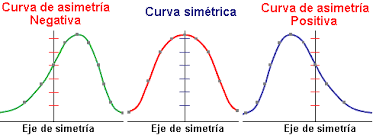

Un conjunto de datos son **discretos** cuando hay un número limitado de valores esperables.Por ejemplo la clase en la que viaja un pasajero,, si vivió o murió).


Hablamos de datos **continuos** cuando pueden tomar cualquier valor en un cierto intervalo.


El **histograma** nos ayuda a ver valores de la distribuciones como son:
- curtosis: medida que nos ayuda a determinar la concentración de los valores. Lo juntos o separados que están. Lo que veíamos con la desviación estándar. La curtosis es parecida.
- simetría: lo centrada o descentrada que está la media respecto a dónde se situan la mayoría de nuestros datos.


### Con Seaborn

El histograma me genera automáticamente una serie de bins (barras) agrupadas que se distribuyen de una manera equitativa. En este ejemplo hace tramos, entre 0 y 4 años, aprox, hay 40 pasajeros. Entre 20 y 24 años tengo casi 100 pasajeros...

In [ ]:
sns.histplot(x=titanic.age); #Bins por defecto, podemos cambiarlo

In [ ]:
#por defecto hace 20 tramos pero lo puedo cambiar. Vamos a verlo con tramos de 10 años
#entre 0-9
#entre 10-19
# entre 20-29...
sns.histplot(x=titanic.age, bins = 8);

In [ ]:
titanic.age.fillna(0, inplace=True)

Hemos manipulado los datos rellenando los NaN con 0 y hemos cambiado la distribución de los datos

In [ ]:
# Los histplot ignoran los NaN cuando se trata de variables numéricas.
sns.histplot(x=titanic.age);

Podemos especificar manualmente el número de `barras`. (tramos, bins o cohortes)

In [ ]:
titanic = sns.load_dataset('titanic')

In [ ]:
sns.histplot(x=titanic.age, bins=40); #ahora tengo columnas por cada 2 años

In [ ]:
sns.histplot(x=titanic.age, bins=80); #ahora tengo una columna por cada año

Podemos elegir si lo rellenamos o no...

Igual solo me interesa ver la silueta y no me interesa tener relleno.

fill = None es para quitar el relleno de las barras

In [ ]:
sns.histplot(x=titanic.age, bins=40, fill=None, color="orange");

In [ ]:
sns.histplot(x=titanic.age, bins=40, fill=None, kde=True);

Podemos pedir una aproximación de la distribución / **kernel density estimation**

Que significa **KDE**:
 es una técnica para estimar la función de densidad de probabilidad de una variable aleatoria. Esta función ayuda a visualizar la forma de la distribución de los datos.

Esto es una función de probabilidad que es: si yo metiera un dato nuevo dentro de estos datos con qué probabilidad estaría en según qué punto. Los grupos de más alta probabilidad con estos datos sería entre 20-30 años.

Cuantas menos repeticiones haya en un bloque de datos menos probailidad tengo de que un nuevo dato sea de ese bloque.

KDE --> https://seaborn.pydata.org/generated/seaborn.kdeplot.html

In [ ]:
sns.histplot(x=titanic.age, bins=30,kde=True);

### Matplotlib

Vamos a hacer el paralelismo con Matplotlib para ver las diferencias.

El link que ves a continuación es para tener el código de colores. Mucha personalización de colores funciona con el valor hexadecimal (o RGB/RGBa, donde la a indica la transparencia del color). CONSEJO: ten a mano siempre los colores cuado vayas a configurar gráficos con unos colores concretos.

https://htmlcolorcodes.com/es/

Todos los parámetros del histograma en Matplotlib:

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

In [ ]:
# bins: por defecto son 10. Si se le da un int eso lo toma como cantidad de barras proporcionales.
    # se le puede pasar una secuencia: [0, 14, 20, 26, 35, 46, 55, 65, 100] por ejemplo.
      # la primera barra irá de 0 (incluido) a 14 (sin coger el 14), la segunda de 14 a 20 (sin coger el 20), y así sucesivamente. Lo vemos en el ejemplo 2



In [ ]:
# ejemplo 1:
titanic.age.plot.hist(bins = 30, color="#00B4FF", rwidth = 0.90); #rwidth es la separación entre las barras, si lo quitamos, al no haberle dado bordes, las va a compactar todas

In [ ]:
titanic.age.plot.hist(bins = [0, 14, 20, 26, 35, 46, 55, 65, 82] # Al poner estas nuevas distribuciones las barras son irregulares.
                                                                 # Se podrían dejar todas las barras exactamente del mismo tamaño y cambiar los valores del eje X
                      ,color="#00B4FF", rwidth=0.90);

In [ ]:
titanic.age.plot.hist(bins=30, color="#fd7e14",rwidth=0.90, histtype="step"); #histtype tipo de histograma
#literalmente le digo que lo haga por escalones, se puede parametrizar de muchas otras maneras

histtype : {'bar', 'barstacked', 'step', 'stepfilled'}, optional
The type of histogram to draw.

- 'bar' is a traditional bar-type histogram. If multiple data are given the bars are arranged side by side.
- 'barstacked' is a bar-type histogram where multiple data are stacked on top of each other.
- 'step' generates a lineplot that is by default unfilled.
- 'stepfilled' generates a lineplot that is by default filled.

Default is 'bar'

## Más variables Stacked Hist

### Seaborn

Al principio hemos visto con las especies de los pingüinos por sexo. Bien, pues vamos a verlo con los datos del titanic por edad y separados por si vivieron o no.

Pero se solapan...

In [ ]:
titanic.columns

In [ ]:
# Vamos a solapar
sns.histplot(data=titanic, x="age", hue="alive");

In [ ]:
sns.histplot(data=titanic, x="age", hue="survived", multiple="stack"); #multiple es para darle instrucciones sobre cómo va a poner las barras, apiladas, superpuestas...

`multiple{“layer”, “dodge”, “stack”, “fill”}`

Approach to resolving multiple elements when semantic mapping creates subsets. Only relevant with univariate data.

Veamos lo mismo, con los datos apilados, para los bloques de edad apilando el conteo de cada clase.

plt es matplotlib, que está en las tripas de seaborn, y así programamos la leyenda con su título y las etiquetas...

Ambas librerías se usan en su conjunto para poder configurar absolutamente todo lo que os podáis imaginar dentro de los gráficos.

In [ ]:
sns.histplot(data=titanic, x= "age", hue="pclass", multiple="stack")
plt.legend(title='Tipo Clase', labels=['Tercera', 'Segunda', 'Primera']); #Añadimos leyenda

In [ ]:
sns.histplot(data=titanic, x= "age", hue="pclass", multiple="stack", bins = 8); #añado bins=8 para verlo por tramos de 10 años
# plt.legend(title='Tipo Clase', labels=['Tercera', 'Segunda', 'Primera']); #Añadimos leyenda

Oye pero... en la leyenda salen como 1, 2, 3... ¿Por qué está poniendo correctamente las etiquetas? ¿Cómo sé en qué orden tengo que ponerlo?

Porque por dentro, más o menos grosso modo, lo hace a la inversa de cómo tiene los datos en la leyenda. Por eso la primera label que le paso será la última...

In [ ]:
sns.histplot(data=titanic, x= "age", hue="pclass", multiple="stack");
plt.legend(title='Tipo Clase', labels=['Tercera', 'Segunda', 'Primera']); #Añadimos leyenda

In [ ]:
titanic.head()

In [ ]:
titanic = sns.load_dataset('titanic')

In [ ]:
dicci = {1:"Primera", 2:"Segunda", 3:"Tercera"} #declaro un diccionario para que traduzca números con palabras

In [ ]:
titanic["pclass"] = titanic.pclass.map(dicci) #map() es una función de mapeo, un diccionario da las instrucciones:
                                              #donde encuentres esto mete esto otro
                                              #sobre pclass aplico el map() de la información del diccionario

In [ ]:
titanic.head()

In [ ]:
titanic.dtypes

In [ ]:
sns.histplot(data=titanic, x= "age", hue="pclass", multiple="stack", bins=40);

In [ ]:
#Podemos cambiar fácilmente el título de la leyenda, de los ejes... Vamos a modificarlo:

In [ ]:
# hay que guardar el objeto como una variable para mayor comodidad
hp = sns.histplot(data=titanic, x= "age", hue="pclass", multiple="stack", bins=40); #element='step', fill=False (en matplotlib era step y ya, aquí es step + fill=False)
# type(hp) -> matplotlib.axes._axes.Axes -> manual y veo todo lo que puedo hacer con este objeto
# hp.set_title('Personas por edad, divididas por clase'); #título
plt.title('Personas por edad, divididas por clase')
plt.xlabel('Edad'); #etiqueta X
plt.ylabel('Cantidad de personas');#etiqueta Y
# plt.xticks(rotation = 45);

In [ ]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack");

In [ ]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="species"); #sin el stack se superponen

No solo puedo condicionar un histplot (es decir, muéstrame los datos con una condición en el dataframe si no que, además, en vez de elegir todas las categorías en el hue, puedo elegir solo las que quiera)

In [ ]:
penguins.flipper_length_mm.max()

In [ ]:
penguins.flipper_length_mm.min()

In [ ]:
penguins[(penguins.species == 'Chinstrap') | (penguins.species == 'Adelie')].species

In [ ]:
sns.histplot(palette="mako", x=penguins[penguins.flipper_length_mm > 180].flipper_length_mm, hue=penguins[(penguins.species=="Adelie")|(penguins.species=="Chinstrap")].species);

Puedo filtrar los datos antes, en pandas, porque es más cómodo, y pasárselos filtrados a seaborn

Docu de los histogramas --> https://seaborn.pydata.org/generated/seaborn.histplot.html
Tutos de Seaborn --> https://interactivechaos.com/es/manual/tutorial-de-seaborn/tutorial-de-seaborn

In [ ]:
#a,b,c = 1,[a for a in range(8)], lambda x: x**2

In [ ]:
#c

In [ ]:
#b

In [ ]:
#vamos a ver cómo podemos poner varias figuras de una
#función como una matriz y le indicamos la posición dentro de la matriz
#esto se llama subplots
#por convención se tratan fig y axs (figuras y ejes)

In [ ]:
fig, axs = plt.subplots(nrows=2, #cuántas filas
                        ncols=2, #cuántas columnas
                        figsize=(10, 7.5)) #tamaño de cada figura
sns.histplot(data=penguins,x="flipper_length_mm", hue="species", ax=axs[0,0]); # Axs = coordenadas de la imagen (fila, columna)

sns.histplot(data=penguins,x="flipper_length_mm", hue="species", multiple="stack", ax=axs[0,1]);

#no aparece nada en la segunda fila porque no le he dado información

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
sns.histplot(data=penguins,x="flipper_length_mm", hue="species", ax=axs[0]) # Axs = coordenadas de la imagen
sns.histplot(data=penguins,x="flipper_length_mm", hue="species", multiple="stack", ax=axs[1])

## Más variables / Barras combinadas
Tiene sentido cuando tenemos variables categóricas

In [ ]:
sns.histplot(data=titanic, x="age", hue="survived", multiple="dodge", bins=40);

## Añadimos KDE al histplot
Las líneas que vamos a añadir son de la librería matplotlib, pero... lo bueno es que podemos combinar ambas librerías, y entonces todo magía 🧙‍♀️🧙‍♂️

In [ ]:
graf = sns.histplot(x=titanic.age, kde=True) # Hemos guardado el gráfico como una variable
graf.axvline(x=titanic.age.mean(), color="red", label="media") #c es color
graf.axvline(x=titanic.age.median(), c="green", label="mediana") #mediana de la columna edad de mi df
graf.axhline(y=40, c="black", label="HORIZONTAL") #Sobre la horizontal marcamos eje y
graf.axvline(x=titanic.age.max(), c="blue", label="mas mayor") #Sobre la vertical marcamos eje x
plt.legend(title='rayas', loc='best');#Leyenda del grafico

In [ ]:
#Posible error si andais con una versiond e SNS por debajo de la 2.20
# actualizamos seaborn	para solucionar el error de la función histplot
# ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.
#%conda update seaborn

## KDE plot
Esta función permite mucho más control sobre la gráfica resultante que la función seaborn.distplot. Si pasamos como primer argumento el conjunto de valores ya calculado en la sección anterior, obtenemos exactamente la misma gráfica.   

In [ ]:
sns.kdeplot(x=titanic.age)
'''La densidad nos indica el porcentaje de observaciones sobre el total registrado. Está normalizado y va de 0 a 1.
Siendo 1 el 100%'''

#### Ahora con más variables
hue!! 🙃

In [ ]:
sns.kdeplot(x=titanic.age, hue=titanic.pclass);

In [ ]:
sns.kdeplot(x=titanic.age, hue=titanic.pclass, fill=True);

[Docu distribuciones](https://seaborn.pydata.org/tutorial/distributions.html) 🤓📖

## Scatterplot
Un diagrama de dispersión (también conocido como **gráfico de dispersión**) utiliza puntos para representar los valores de dos variables numéricas diferentes. La posición de cada punto en el eje horizontal y vertical indica los valores de un punto de datos individual. Los gráficos de dispersión se utilizan para observar las relaciones entre las variables.

### Seaborn

In [ ]:
sns.scatterplot(x="body_mass_g", y="flipper_length_mm", data=penguins);
plt.ylabel('Longitud de aleta (en mm)');
plt.xlabel('Peso del pingüino (en g)');

Además podemos ver la regresión lineal

y = mx + n

La n es la ordenada en el origen: en qué punto corta nuestra recta con el eje Y

La m es la pendiente:
- positiva hacia arriba
- negativa hacia abajo

La regresión lineal es la recta que mejor cumple que la distribución de puntos estén todos en la medida de lo posible lo más cercanos a ella.

En el ejemplo lo que se pretende es que podamos predecir de manera más o menos precisa que si entro con la información del eje X pueda saber con mayor o menor probabilidad de acierto el tamaño de la aleta (que es la información que hay en Y).

Los modelos de regresión quieren predecir un valor. Es decir, tengo el peso del pingüino y quiero predecir la longitud de su aleta. Este sería un modelo predictivo de regresión.

También hay modelos de clasificación. En base a unos datos quiero predecir la variable categórica (por ejemplo el sexo).

El sombreado azul alrededor de la línea azul es el intervalo de confianza. Cuanto menor sea ese sombreado más fiable va a ser la predicción.

In [ ]:
sns.regplot(x="body_mass_g", y="flipper_length_mm", data=penguins); #linear regression / regresion lineal
plt.ylabel('Longitud de aleta (en mm)');
plt.xlabel('Peso del pingüino (en g)');

![](https://pbs.twimg.com/media/FpeyZ4dWIAAjwbN.png)

###  Matplotlib

In [ ]:
plt.scatter(data=penguins, x='body_mass_g', y='flipper_length_mm');

In [ ]:
plt.scatter(x=penguins.body_mass_g, y=penguins.flipper_length_mm);

### Más categorías

Añadiendo las especies en el hue vamos a poder tener más información pues veremos cada especie de un color.

In [ ]:
sns.scatterplot(x="body_mass_g", y="flipper_length_mm", hue="species",data=penguins);

![pingus](http://d3i3l3kraiqpym.cloudfront.net/wp-content/uploads/2016/04/26094914/Ad%C3%A9lie-Chinstrap-and-gentoo-penguin-species.jpg)

Podemos hacer que el tamaño de los puntos dependa de una variable numérica

In [ ]:
penguins.columns

In [ ]:
sns.scatterplot(x="body_mass_g", y="flipper_length_mm", hue="species",data=penguins, size="bill_length_mm");

In [ ]:
sns.scatterplot(x="body_mass_g", y="flipper_length_mm", hue="species",data=penguins, size="sex");

In [ ]:
sns.scatterplot(x="body_mass_g", y="flipper_length_mm", hue="species",data=penguins, size="sex", sizes=(5, 200), alpha=0.5);
'''alpha corresponde con la opacidad 1 = opaco, 0 = no vas a ver nada'''

In [ ]:
penguins

In [ ]:
fig = sns.scatterplot(x="body_mass_g", y="flipper_length_mm",
                      hue="species", #tres colores
                      data=penguins,
                      style="island", #diferentes símbolos
                      size = "sex",
                      sizes = (30, 100)) #diferentes tamaños
sns.move_legend(fig, "lower right") #así podemos mover nuestra leyenda

### Con variables categóricas

Al trabajar con variables categóricas puedo ver si la información está junta, cercana, pero en el caso de chinstrap y gentoo veo que hay algunos puntos claramente fuera del grupo. Esto son **OUTLIERS** son datos que rompen la media.

In [ ]:
sns.scatterplot(data=penguins, x="species", y="body_mass_g", alpha = 0.3);

Como ya lo tengo separado por especies en este caso mejor hacer un hue por la isla en la que viven. Así veo que chinstrap y gentoo viven exclusivamente en una isla concreta cada uno, pero los adelie viven en cualquier isla.

In [ ]:
sns.scatterplot(data=penguins, x="species", y="body_mass_g", hue="island", alpha = 0.4);

### CATPLOT

La representación por defecto de los datos en catplot() utiliza un gráfico de dispersión. En realidad hay dos gráficos de dispersión categóricos diferentes en seaborn. Adoptan diferentes enfoques para resolver el principal reto de representar datos categóricos con un gráfico de dispersión, que es que todos los puntos que pertenecen a una categoría caigan en la misma posición a lo largo del eje correspondiente a la variable categórica.

Nos da una ventaja que es que nos da una apertura a los datos para poder ver mejor la información. Tiene un parámetro que es el jitter= que es si quieres los datos dispersados o aplanados (poco sentido tiene darle el True, pues representará los datos igual que scatterplot)

In [ ]:
sns.catplot(data=penguins, x="species", y="body_mass_g", hue='sex');

In [ ]:
sns.catplot(data=penguins, x="species", y="body_mass_g", jitter=False); #El parámetro jitter convierte el catplot en el scatter

### SWARMPLOT
Dibuja un gráfico de dispersión categórica con puntos no superpuestos.

In [ ]:
penguins.sample(3)

In [ ]:
sns.swarmplot(data=penguins, x="species", y="body_mass_g", hue="island");

In [ ]:
sns.swarmplot(penguins, x='body_mass_g', y='species', hue='island');

In [ ]:
#penguins.sex.isna().sum(), hay nans en el sexo de los pingüinos

In [ ]:
sns.swarmplot(data=penguins, x="body_mass_g", y="species", hue="sex");

## JOINTPLOT
Dibuja un gráfico de dos variables con gráficos bivariados y univariados. Es parecido a un scatterplot pero añade los histogramas individuales de ambas variables

In [ ]:
penguins.sample(3)

Tengo dos grupos diferenciados dentro de la dispersión: pico estrecho, aleta larga; pico ancho, aleta corta. Son pingüinos que aleta/pico son contrarios.

Atendiendo solo al pico en el graf de barras superior el conteo de datos que tengo. El otro lateral el conteo de las aletas.

Así veo en cantidad los datos así como la relación que tienen.

In [ ]:
sns.jointplot(data=penguins, x="bill_depth_mm", y="flipper_length_mm")

Veo que tengo dos grupos diferenciados, pero atendiendo a su separación por especies veo claramente que gentoo mirando únicamente pico y aleta podría saber si ese pingüino es gentoo porque está distribuido claramente de manera diferente que el resto.

In [ ]:
sns.jointplot(data=penguins, x="bill_depth_mm", y="flipper_length_mm", hue="species")

Viendo el peso vs tamaño de la aleta se sigue viendo que gentoo se diferencia del resto. Pero seguimos sin ver cómo se pueden distinguir adelie y chinstrap...

In [ ]:
sns.jointplot(data=penguins, x= "body_mass_g", y= "flipper_length_mm", hue="species")

### ¿Se puede hacer un Jointplot con matplotlib?
Sí, pero hay que establecer las figuras y hacerlo de forma independiente.... aquí un [tutorial](https://stackabuse.com/matplotlib-scatter-plot-with-distribution-plots-histograms-jointplot/)

## PAIRPLOT
Ploteamos relaciones entre las variables

En las dispersiones vemos la comparación entre variables continuas. Variable del eje X contra eje Y. En la diagonal hace un countplot, coincide la variable de eje X con la del eje Y, así vemos la distribución.

In [ ]:
 #Aquí ponemos hue con las especies porque el dataset está clasificado así

In [ ]:
#penguins.corr()

In [ ]:
sns.pairplot(penguins)

Al meter el hue= tendría que hacer 3 countplots solapados, y lo que hace para solucionar ese problema es hacer el KDE sombreado.

In [ ]:
sns.pairplot(penguins, hue="species")

Cargamos otro dataset dentro de seaborn que son datos sobre flores. Ahora vemos información sobre pétalo y sépalo de cada flor.

In [ ]:
iris = sns.load_dataset("iris")
iris.head()

In [ ]:
iris.species.unique() # Tres espcies de flores que tenemos en nuestro df

In [ ]:
sns.pairplot(iris, hue="species")

## LINEPLOT

Este dataset sobre vuelos es el que se ha usado al principio para el gráfico de velas. Fijémonos únicamente en el mes de abril. Quiero ver qué pasa en los meses de abril. Filtramos los datos por el mes de abril y lo guardamos en una variable, así en el lineplot le digo que los datos es la variable que acabo de guardar para ver la evolución de pasajeros en el mes de abril.

In [ ]:
vuelos.head()

In [ ]:
abril = vuelos[vuelos["month"] == "Apr"]

In [ ]:
abril.sample(2)

In [ ]:
sns.lineplot(data=abril, x="year", y="passengers")

Ahora vamos a ver TODOS los datos pero separados por mes. De un simple vistazo se ve que hay una temporalidad en los vuelos, pues hay 4 meses que indistintamente del año siempre están por encima que el resto de meses.

In [ ]:
sns.lineplot(data=vuelos, x="year", y="passengers", hue="month")

Instalamos una nueva librería, plotly. Su alias estándar es 'px'. Con esta librería podemos hacer visualizaciones interactivas. También podemos filtrar los datos de manera interactiva pulsando en las variables desde la leyenda y ver los puntos exactos de datos...

In [ ]:
%pip install plotly.express

In [ ]:
#%pip install plotly.express
import plotly.express as px #px es standard para potly.express

fig = px.line(data_frame = vuelos, x="year", y="passengers", color='month')
fig.show()

In [ ]:
fig.write_html('/content/drive/MyDrive/gamma/Data/00. Data/vuelos.html')

In [ ]:
# puedo guardarlo como un objeto de html
#figura = fig.write_html('ruta/nombre_del_archivo.html')

#html es código que lo interpreta el navegador

## Matriz de Correlación
La matriz de correlación es una importante métrica de análisis de datos que se calcula para resumir los datos a fin de comprender la relación entre las diversas variables y tomar decisiones en consecuencia.

La matriz de correlación está en PANDAS. Antes no era necesario numeric_only=

Cambiarán eso en PANDAS, próximamente el default sera False, y por eso hay que darle el True para que únicamente trabaje con las variables continuas.

La correlación nos indica el nivel de relación que hay entre 2 variables. Cuanto más cercanas a 1 (o -1) estén mayor relación tienen.
- En caso de estar cerca de 1 la relación es directa. Cuanto mayor sea el valor de una variable mayor será el de la otra.
- En caso de estar cerca de -1 es que su relación es inversa. Cuanto mayor sea el valor de una variable, menor será el de la otra.

**CUIDADO** no confundir correlación con causalidad. Una cosa es que mis variables estén relacionadas y otra cosa es que una sea consecuencia de la otra.

En el ejemplo del link: las curvas de la inversión en investigación y los suicidios tienen el mismo comportamiento. ¿Pero tiene relación el gasto en la inversión con la cantidad de gente que se suicida? NO

Personas que se ahogan en una piscina vs apariciones de nicolas cage en peliculas. Comportamiento similar de los datos en correlación pero no en causalidad, pues no tiene nada que ver una cosa con la otra.

https://tylervigen.com/spurious-correlations

In [ ]:
titanic.corr(numeric_only=True)

In [ ]:
corr = penguins.corr(numeric_only=True)
corr

Nos importamos numpy para lo siguiente.

Hago una array para hacer una lista de listas y creo una variable 'mascara'. En la documentación veis como funciona .triu() y .ones_like()

Con triu triangulamos la matriz. El 1 es la diagonal que va de punta a punta. Cuando a np.triu(array,1) le digo 1 convierte la diagonal que va de punta a punta en 0, para él es como un False. Le damos la instrucción de que no pinte esos datos. Yo sé que en la matriz de correlación la diagonal va a ser siempre 1.0. En la correlación hay simetría, la información que aparece es simétrica a un lado y al otro de la diagonal de 1.

Hago la variable máscara y le digo a np que triangule (triu, la u es de upper) y le digo que corte por la diagonal. Así podemos facilitar la interpretación a través de un mapa de calor utilizando seaborn.

In [ ]:
import numpy as np

[np triu doc ](https://numpy.org/doc/stable/reference/generated/numpy.triu.html)       
[np ones_like doc](https://numpy.org/doc/stable/reference/generated/numpy.ones_like.html)

Heatmap del titanic

In [ ]:
array = [[1,2,3],[4,5,6],[7,8,9]]
array

In [ ]:
mascara = np.triu(array,1)
mascara

Triangulo la matriz de correlación y que lo interprete como booleanos. Donde se encuentre un 0 que no pinte nada. Utilizo una paleta de colores divergente y que lo gradúe en colores. A este heatmap le paso como data lo que tengo guardado como corr, como mask lo que acabo de arreglar con la triangulación. También le digo que use la paleta de colores que acabo de preparar (cmap=) que me lo haga entre 0 y 1.

Estoy pintando los datos que hay 3 celdas más arriba (guardados como corr)

Así veo lo que está relacionado directamente viendo aquellos cuadros que están cercanos a rojo.

dentro de mascara = np.triu(np.ones_like(corr, dtype=bool), con np.ones_like() le doy la orden para que sea el triángulo de abajo.

In [ ]:
mascara = np.triu(np.ones_like(corr, dtype=bool)) # generamos la máscara para la triangular superior
color_map = sns.diverging_palette(220, 20, as_cmap=True) # Paleta de colores
sns.heatmap(corr,
            mask = mascara,
            cmap=color_map,
            square=True, #que los datos se vean como cuadrados
            linewidth=0.5, #ancho de línea
            vmax=1,
            vmin=-1,
            cbar_kws={"shrink": .5
                     },# barra lateral
            annot=True #Anotacion, que te ponga el valor de la corr() dentro de la casilla
);

### NO CONFUNDIR
**Correlación** con **Causalidad** --> https://www.tylervigen.com/spurious-correlations

Esto está comentado un poco más arriba pero si quieres volver a reír pues eso.

Documentación sobre las paletas de seaborn

[doc paletas](https://seaborn.pydata.org/tutorial/color_palettes.html)

In [ ]:
color_map

También se puede hacer en valores absolutos (el valor absoluto convertirá todos los negativos en valores positivos.

Lo único que hago es añadir el método

```
.abs()
```



In [ ]:
corr_abs = titanic.corr(numeric_only = True).abs()
corr_abs

En este caso se ha modificado la paleta de colores para que si son tonos más oscuros tienen menor relación. Únicamente me interesa ver la influenia, me da igual si es una correlación positiva o negativa. Si hago el absoluto únicamente tengo que ver un tono de color (y no uno para correlación directa y otro para correlación indirecta)

Si luego quiero ver si esa influencia es directa o indirecta.

In [ ]:
mascara = np.triu(np.ones_like(corr_abs, dtype=bool)) # generamos la máscara para la triangular superior
color_map = sns.diverging_palette(0, 10, as_cmap=True) # paleta de colores
sns.heatmap(corr_abs,
            mask = mascara,
            square=True, #que los datos se vean como cuadrados
            linewidth=0.5, #ancho de línea
            vmax=1,
            cbar_kws={"shrink": .7} #barra lateral
);

Heatmap de los pingüinos

In [ ]:
mascara = np.triu(np.ones_like(corr, dtype=bool)) # generamos la máscara para la triangular superior
#color_map = sns.diverging_palette(0, 10, as_cmap=True) # paleta de colores
color_map = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr,
            mask = mascara,
            cmap=color_map,
            square=True, #que los datos se vean como cuadrados
            linewidth=0.5, #ancho de línea
            vmax=1,
            cbar_kws={"shrink": .5}, #barra lateral
            annot=True
);

In [ ]:
titanic

## Boxplot
Este tipo de gráfico muestra los tres valores del cuartil de la distribución junto con los valores extremos. Los "bigotes" se extienden a los puntos que se encuentran dentro de 1,5 IQRs del cuartil inferior y superior, y luego las observaciones que caen fuera de este rango se muestran de forma independiente. Esto significa que cada valor en el boxplot corresponde a una observación real en los datos.

Las líneas:  
 - La del medio: la mediana
 - La del medio a la izquierda: Q1: percentil 25%
 - Media de la derecha: Q3: percentil 75%

 - Izquierda: Q1 - 1.5 IQR
 - Derecha: Q3 + 1.5 IQR

Primer cuartil: el 25% de los valores son menores o igual a este valor (punto 2 en el gráfico anterior).    
Mediana o Segundo Cuartil: Divide en dos partes iguales la distribución. De forma que  el 50% de los valores son menores o igual a este valor (punto 3 en el gráfico siguiente).    
Tercer cuartil: el 75% de los valores son menores o igual a este valor (punto 4 en el gráfico siguiente).    
Rango Intercuartílico (RIC): Diferencia entre el valor del tercer cuartil y el primer cuartil.

Boxplot va a mirar todos los datos que tengo y mostrará la distribución. Hace los cálculos de los cuartiles y el dato central será la mediana.

Del medio a la izquierda está el 75% de los datos. Del medio a la derecha están el 25%.

En los cortes del gráfico es donde se encuentran los datos estadísticamente esperables. Si hay puntos fuera de los cortes es porque hay **OUTLIERS** que son los datos que salen del común de mis datos.

In [ ]:
ax1 = sns.boxplot(x="age", data=titanic)
plt.show(ax1)

ax2 = sns.boxplot(x='fare', data=titanic)
plt.show(ax2)

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols=2, figsize=(12,8))
sns.boxplot(x="age", data=titanic, ax=axs[0])
sns.boxplot(x="fare", data=titanic, ax=axs[1], color='red')

En 28 es donde tengo la mediana. Es mi dato central en estos datos.

Recuerda la distribución (es una campana de gauss junto al gráfico de velas con el sombreado verde). Esto es otra manera de ver esa distribución y dónde están más concentrados los datos y los que se escapan totalmente de esa mayor concentración.

Puedo calcular dónde cortan los datos con el rango intercuartílico.

In [ ]:
titanic.age.median()

En el boxplot anterior he mirado la distribución de la edad de todo el dataset. Si miro lo mismo por clase veo que realmente donde tengo **outliers** es en segunda y en tercera clase, pero que en primera clase no. Ahí, según el estudio de los datos que se haga, puedo tratar a primera clase a parte y luego las otras dos excluyendo (o no) los outliers... quizá tratar todo el conjunto de datos únicamente excluyendo los outliers en general... depende de qué busques.

In [ ]:
sns.boxplot(x="pclass", y="age", data=titanic)

GRAFIO ILUSTRATIVO, no sirve para pintar de manera muy aclarativa.

La línea de abajo de la caja de color es q1, de ahí hasta abajo del todo (incluidos los datos fuera del límite) son el 25% de los datos. Del borde a la línea de en medio hay otro 25% (ya tenemos 50%). De esa línea de en medio (q2) al siguiente borde tenemos otro 25% (ya tenemos el 75% de los datos). De ese borde hasta el último dato de arriba tenemos el otro 25%.

Los cortes de las líneas negras indican dónde quedan los cortes para ver los outliers.

In [ ]:
ax = sns.boxplot(x="day", y="total_bill", data=tips)
ax = sns.swarmplot(x="day", y="total_bill", data=tips, color=".25")

In [ ]:
fig = px.box(titanic, x="pclass", y="age", points="all") #Points añade los puntos a la izquierda de cada box
fig.show()

## ViolinPlot
Un gráfico de violín es un método para representar datos numéricos. Es similar a un diagrama de caja, con la adición de un diagrama de densidad del núcleo girado en cada lado

La densidad es lo mismo que el KDE, es simétrico porque sí.

Guardo la variable violin, a esa variable (que es el gráfico) le añado una línea vertical en el eje X. Que indique dónde está la mediana, de color rojo con la etiqueta median y saca el plot con leyenda.

La raya negra horizontal es lo mismo que se ve en el boxplot, el tramo que es más ancho es la caja de color del boxplot. La curva es la densidad (KDE).

In [ ]:
violin = sns.violinplot(x=titanic.age)
violin.axvline(x=titanic.age.median(), c="red", label="median")
plt.legend()

In [ ]:
sns.violinplot(x=penguins.bill_length_mm, y=penguins.species);

## Pie plot 👀
⚠️ NO muestra muy efectivamente los datos cuantitativos.     
⚠️ Las pequeñas porciones, por ejemplo del 2% del total, corren el riesgo de quedar invisibles en el Chart.      
⚠️ A las personas se les hace muy difícil comparar áreas y ángulos entre sí, sobretodo cuando presentan valores similares.

In [ ]:
datos = penguins["species"].value_counts()
datos

plotea un pie. En el argumento de autopct (autoporcentaje) le paso '%.número_de_decimalesf%%' (f%% en formato porcentual)

In [ ]:
datos.plot.pie(autopct="%.1f%%")

In [ ]:
datos = titanic.pclass.value_counts()
datos.plot.pie(autopct="%.2f%%")

## Subplots
Utilizados para pintar varios gráficos en una misma "imagen"

Todo lo que hemos visto se puede poner en común, con un subplot.

Estoy juntando una cantidad de gráficos en un único objeto visual. Útil cuando tengo gráficos que están relacionados y resulta interesante tenerlos conjuntamente.

plt.subplots() va a arrojar dos valores. Pongo las dos variables delante (fig, axs por convención) pues el primer valor que me va a arrojar es la figura y el siguiente el eje.

Para hacer el subplots() le doy el número de filas, el número de columnas y el tamaño que tendrán las figuras (los gráficos).

A continuación van los gráficos que hago. El primero y el penúltimo están hechos con matplotlib, los restantes con seaborn. Dentro de cada línea de código para cada gráfico, con el argumento **ax=** le digo **eje[x,x]**.

En el momento de indicar las filas y columnas de la grilla para los gráficos se le ha adjudicado las variables figura, eje. Por convención estándar se suelen nombrar fig, axs. Dentro del argumento ax= entonces sería **ax = axs[x,x]** (donde x son el ÍNDICE de la posición **[indice_fila, indice_columna]**)

In [ ]:
# Creamos una figura y ejes, donde luego accederemos a ellos en forma de coordenadas [fila,columna]
figura, eje = plt.subplots(nrows=2, ncols=3, figsize=(20,15))
penguins.groupby(["species","sex"])["sex"].count().unstack()plot(kind="barh", ax=eje[0,0])
sns.violinplot(x =penguins.bill_length_mm, y=penguins.species,ax=eje[0,1])
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", ax=eje[0,2])
sns.swarmplot(data=penguins, x="body_mass_g", y="sex", hue="species", ax=eje[1,0])
datos.plot.pie(autopct="%.1f%%",ax=eje[1,1])
sns.countplot(x=penguins.sex, ax=eje[1, 2])

## Guardar Plots

In [ ]:
scatter = sns.scatterplot(x="body_mass_g", y="flipper_length_mm", data=penguins, hue="species");
scatter.figure.savefig("../images/scatter.jpg", dpi=1000) #para que se guarde esto se tiene poner la ruta en la que se quiere guardar y darle un nombre


In [ ]:
df_edades = titanic.groupby(['sex', 'age'])[['age']].count()

In [ ]:
df_edades.to_excel('/content/drive/MyDrive/gamma/Data/00. Data/grafico_de_barras_que_no_hay_que_hacer.xlsx')

# BONUS: visualizaciones útiles

## Hexbin:
Un gráfico **hexbin** es una alternativa al gráfico de dispersión (*scatter*). Cuando un conjunto de datos es demasiado grande el gráfico de dispersión puede resultar denso.

**Descripción:**
- Se puede utilizar para representar la distribución de puntos en un plano.
- La representación de puntos no es individual, como sí es en un gráfico de dispersión, en su lugar agrupa los puntos en hexágonos regulares.
- La densidad se representa en una escala de colores, facilitando la visualización de mayor o menor concentración de datos.

**Ventajas frente al gráfico de dispersión**
- Facilidad en la interpretación de grandes conjuntos de datos: frente a la gran densidad que puede haber en el gráfico de dispersión para grandes conjuntos de datos, los gráficos hexbin reducen la complejidad visual al representar los puntos agrupados en formas hexagonales.
- Mayor precisión: cada hexágono representa una zona determinada del espacio bidimensional permitiendo una mayor precisión al mostrar la distribución. Esto permite capturar patrones más precisos y sutiles.
- Evita la superposición de valores: en un gráfico de dispersión podemos tener los puntos solapados. Hexbin lo resuelve al representar los datos distribuidos en hexágonos con un color, o intensidad, para diferenciar el volúmen de datos que contienen.

Para poder ver la diferencia voy a crear un conjunto de datos ficticio. Así podemos ver la diferencia entre *scatter* y *hexbin*

In [ ]:
# librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Matplotlib inline para visualizar los gráficos de Matplotlib
#Para que se vean los gráficos en el notebook
%matplotlib inline
#Para que se vean los gráficos en alta resolución
%config Inlinebackend.figure_format= 'retina'
# Configuración para setear y que todas las fig de Seaborn salgan por defecto con este tamaño
# Se puede especificar el tamaño de cada figura
sns.set_context("poster") #paper, notebook, talk, poster
sns.set(rc={"figure.figsize": (8.,4.)}) #Tamaño de las figuras
sns.set_style("whitegrid") #darkgrid, whitegrid, dark, white, ticks
#sns.set_palette("colorblind") # deep, muted, pastel, bright, dark, colorblind

In [ ]:
# Generar datos aleatorios
np.random.seed(1)
x = np.dot(np.random.random(size = (2, 2)), np.random.normal(size = (2, 3000))).T

In [ ]:
x

In [ ]:
# Crear el gráfico de dispersión
plt.scatter(x[:, 0], x[:, 1]);

In [ ]:
# Crear el gráfico de Hexbin
hb = plt.hexbin(x[:, 0], x[:, 1],
                gridsize=20, # para indicar el tamaño de los hexágonos
                cmap='Blues' # para indicar la paleta de colores
                );

# Agregar la escala de color
plt.colorbar(hb); # añadir escala de color

In [ ]:
df = sns.load_dataset('penguins')
df.head(3)

In [ ]:
# Seaborn
hb = sns.jointplot(data = df,           # datos
              x = 'flipper_length_mm',  # variable eje x
              y = 'body_mass_g',        # variable eje y
              kind = 'hex',             # tipo de gráfico
              cmap = 'Blues',           # escala de color
              bins = 30,                 # cantidad de agrupaciones
              gridsize = 20             # tamaño de los hexágonos
              );

## Distplot / FacetGrid

- [Facetting histograms by subsets of data](https://seaborn.pydata.org/examples/faceted_histogram.html)
- [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)
- [PairGrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html#seaborn.PairGrid)

In [ ]:
df = sns.load_dataset('tips')

In [ ]:
# Facetting histograms
sns.displot(df,                                 # data
            x="flipper_length_mm",              # eje x
            col="species",                      # columnas
            row="sex",                          # similar a hue, separa por filas la información de cada categoría disponible en esa variable
            binwidth=3,                         # ancho de las columnas
            height=3,                           # alto de las columnas
            facet_kws=dict(margin_titles=True)
            )